In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d dikisahkan/transjakarta-transportation-transaction

Dataset URL: https://www.kaggle.com/datasets/dikisahkan/transjakarta-transportation-transaction
License(s): CC0-1.0
transjakarta-transportation-transaction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile

with zipfile.ZipFile('transjakarta-transportation-transaction.zip', 'r') as zip_ref:
    zip_ref.extractall('transjakarta-transportation-transaction')

# **Library**

In [7]:
!pip install folium

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import folium
import warnings

# **Data Overview**

In [8]:
df = pd.read_csv('transjakarta-transportation-transaction/dfTransjakarta180kRows.csv') #Melihat atau membaca data csv
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,VRPJ892P3M98RA,3561407960318444,dki,"Dr. Janet Nashiruddin, M.Ak",M,2010,4,Pulo Gadung 2 - Tosari,1.0,P00167,...,106.891650,12,2023-04-03 06:53:02,P00127,Layur,-6.193539,106.899090,13.0,2023-04-03 07:13:28,3500.0
1,ZWCH834I6M26HS,347728053419394,emoney,Balamantri Rahayu,M,2002,JAK.28,Kp. Rambutan - Taman Wiladatika,1.0,B04633P,...,106.862980,27,2023-04-03 05:59:19,B00865P,Jln. Ar Ridho,-6.308148,106.869350,30.0,2023-04-03 06:57:06,0.0
2,YRLD835V6L82GO,377105453850671,emoney,Dian Mustofa,F,1993,B13,Bekasi Barat - Blok M,1.0,B02192P,...,106.992150,6,2023-04-03 05:13:24,B00108P,Bandar Djakarta Bekasi,-6.227085,106.996830,9.0,2023-04-03 06:01:23,20000.0
3,ZZBX143N6N83HQ,4486493302356581,dki,"Cut Janet Suryatmi, M.Ak",M,1980,8K,Batusari - Grogol,1.0,B03637P,...,106.782130,16,2023-04-03 05:20:24,NaN,Yayasan Alkahfi Jakbar,-6.198896,106.768890,26.0,2023-04-03 06:01:25,3500.0
4,EWEG491A2W45DR,30139379978125,bni,"dr. Mulyanto Pudjiastuti, M.Ak",F,1997,NaN,NaN,0.0,NaN,...,106.835140,2,2023-04-03 06:00:54,B02755P,Perpustakaan Nasional,-6.180673,106.826430,5.0,2023-04-03 06:47:32,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189495,AEQP180C2Q77IS,378254320267609,emoney,"R.A. Malika Samosir, S.Kom",M,1998,JAK.43B,Tongtek - Tebet Eco Park (TEP) - Cililitan,1.0,B06271P,...,106.852860,24,2023-04-02 13:00:49,B03318P,Sawo Kecik Raya,-6.224852,106.854890,34.0,2023-04-02 14:54:30,0.0
189496,PJOF006Z8Q63II,5406087682675422,dki,Amalia Gunarto,M,1981,9C,Pinang Ranti - Bundaran Senayan,1.0,P00040,...,106.858140,9,2023-04-04 17:31:55,P00030,Cawang Ciliwung Arah Timur,-6.243012,106.863540,10.0,2023-04-04 18:38:31,3500.0
189497,NTSG621H8U49WW,4674674527076302608,brizzi,R.A. Lintang Wibisono,F,1998,6T,Pasar Minggu - Velbak,1.0,B06746P,...,106.808665,17,2023-04-05 10:37:19,B06750P,Sbr. SDN Cilandak Barat 15,-6.288628,106.806811,19.0,2023-04-05 12:20:28,3500.0
189498,PUNA543S2M10LX,4952762933693,online,Yunita Sitompul,F,1984,2,Pulo Gadung - Monas,1.0,P00005,...,106.888800,12,2023-04-14 13:34:20,P00192,Pulo Gadung 1,-6.183239,106.909070,15.0,2023-04-14 16:05:12,3500.0


In [9]:
df.info() #memberikan informasi jumlah kolom dan nama kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189500 entries, 0 to 189499
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transID           189500 non-null  object 
 1   payCardID         189500 non-null  int64  
 2   payCardBank       189500 non-null  object 
 3   payCardName       189500 non-null  object 
 4   payCardSex        189500 non-null  object 
 5   payCardBirthDate  189500 non-null  int64  
 6   corridorID        182520 non-null  object 
 7   corridorName      175972 non-null  object 
 8   direction         189500 non-null  float64
 9   tapInStops        182259 non-null  object 
 10  tapInStopsName    189500 non-null  object 
 11  tapInStopsLat     189500 non-null  float64
 12  tapInStopsLon     189500 non-null  float64
 13  stopStartSeq      189500 non-null  int64  
 14  tapInTime         189500 non-null  object 
 15  tapOutStops       177131 non-null  object 
 16  tapOutStopsName   18

# **Data Preprocessing**

In [10]:
  df_droped = df.dropna() # Menghapus data yang bernilai Nol
  df_droped

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,VRPJ892P3M98RA,3561407960318444,dki,"Dr. Janet Nashiruddin, M.Ak",M,2010,4,Pulo Gadung 2 - Tosari,1.0,P00167,...,106.891650,12,2023-04-03 06:53:02,P00127,Layur,-6.193539,106.899090,13.0,2023-04-03 07:13:28,3500.0
1,ZWCH834I6M26HS,347728053419394,emoney,Balamantri Rahayu,M,2002,JAK.28,Kp. Rambutan - Taman Wiladatika,1.0,B04633P,...,106.862980,27,2023-04-03 05:59:19,B00865P,Jln. Ar Ridho,-6.308148,106.869350,30.0,2023-04-03 06:57:06,0.0
2,YRLD835V6L82GO,377105453850671,emoney,Dian Mustofa,F,1993,B13,Bekasi Barat - Blok M,1.0,B02192P,...,106.992150,6,2023-04-03 05:13:24,B00108P,Bandar Djakarta Bekasi,-6.227085,106.996830,9.0,2023-04-03 06:01:23,20000.0
5,KTGG277R2I90ZB,30394281967910,bni,"Dasa Prakasa, S.I.Kom",F,1993,JAK.117,Tanjung Priok - Tanah Merdeka,1.0,B04272P,...,106.896380,17,2023-04-03 05:06:00,B04818P,Simpang Gotong Royong 2,-6.125482,106.893310,21.0,2023-04-03 05:41:04,0.0
6,VSJU956Z4T24LI,4974829151599657,dki,Elvina Hasanah,M,1966,9F,Rusun Tambora - Pluit,0.0,P00090,...,106.793520,5,2023-04-03 06:21:07,P00170,Penjaringan,-6.126306,106.792030,7.0,2023-04-03 06:52:58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189495,AEQP180C2Q77IS,378254320267609,emoney,"R.A. Malika Samosir, S.Kom",M,1998,JAK.43B,Tongtek - Tebet Eco Park (TEP) - Cililitan,1.0,B06271P,...,106.852860,24,2023-04-02 13:00:49,B03318P,Sawo Kecik Raya,-6.224852,106.854890,34.0,2023-04-02 14:54:30,0.0
189496,PJOF006Z8Q63II,5406087682675422,dki,Amalia Gunarto,M,1981,9C,Pinang Ranti - Bundaran Senayan,1.0,P00040,...,106.858140,9,2023-04-04 17:31:55,P00030,Cawang Ciliwung Arah Timur,-6.243012,106.863540,10.0,2023-04-04 18:38:31,3500.0
189497,NTSG621H8U49WW,4674674527076302608,brizzi,R.A. Lintang Wibisono,F,1998,6T,Pasar Minggu - Velbak,1.0,B06746P,...,106.808665,17,2023-04-05 10:37:19,B06750P,Sbr. SDN Cilandak Barat 15,-6.288628,106.806811,19.0,2023-04-05 12:20:28,3500.0
189498,PUNA543S2M10LX,4952762933693,online,Yunita Sitompul,F,1984,2,Pulo Gadung - Monas,1.0,P00005,...,106.888800,12,2023-04-14 13:34:20,P00192,Pulo Gadung 1,-6.183239,106.909070,15.0,2023-04-14 16:05:12,3500.0


In [11]:
df_droped.info() #memberikan informasi jumlah kolom dan nama kolom

<class 'pandas.core.frame.DataFrame'>
Index: 153963 entries, 0 to 189499
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transID           153963 non-null  object 
 1   payCardID         153963 non-null  int64  
 2   payCardBank       153963 non-null  object 
 3   payCardName       153963 non-null  object 
 4   payCardSex        153963 non-null  object 
 5   payCardBirthDate  153963 non-null  int64  
 6   corridorID        153963 non-null  object 
 7   corridorName      153963 non-null  object 
 8   direction         153963 non-null  float64
 9   tapInStops        153963 non-null  object 
 10  tapInStopsName    153963 non-null  object 
 11  tapInStopsLat     153963 non-null  float64
 12  tapInStopsLon     153963 non-null  float64
 13  stopStartSeq      153963 non-null  int64  
 14  tapInTime         153963 non-null  object 
 15  tapOutStops       153963 non-null  object 
 16  tapOutStopsName   153963 

# **Exploration Data Analysis( Karakteristik Costumer )**

In [12]:
df1 = df_droped #inisialisasi data yang telah dihapus dengan variabel df_droped menjadi df1

In [13]:
df1.columns #melihat columns df1

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [14]:
df1.head() #melihat dataframe 5 teratas

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,VRPJ892P3M98RA,3561407960318444,dki,"Dr. Janet Nashiruddin, M.Ak",M,2010,4,Pulo Gadung 2 - Tosari,1.0,P00167,...,106.89165,12,2023-04-03 06:53:02,P00127,Layur,-6.193539,106.89909,13.0,2023-04-03 07:13:28,3500.0
1,ZWCH834I6M26HS,347728053419394,emoney,Balamantri Rahayu,M,2002,JAK.28,Kp. Rambutan - Taman Wiladatika,1.0,B04633P,...,106.86298,27,2023-04-03 05:59:19,B00865P,Jln. Ar Ridho,-6.308148,106.86935,30.0,2023-04-03 06:57:06,0.0
2,YRLD835V6L82GO,377105453850671,emoney,Dian Mustofa,F,1993,B13,Bekasi Barat - Blok M,1.0,B02192P,...,106.99215,6,2023-04-03 05:13:24,B00108P,Bandar Djakarta Bekasi,-6.227085,106.99683,9.0,2023-04-03 06:01:23,20000.0
5,KTGG277R2I90ZB,30394281967910,bni,"Dasa Prakasa, S.I.Kom",F,1993,JAK.117,Tanjung Priok - Tanah Merdeka,1.0,B04272P,...,106.89638,17,2023-04-03 05:06:00,B04818P,Simpang Gotong Royong 2,-6.125482,106.89331,21.0,2023-04-03 05:41:04,0.0
6,VSJU956Z4T24LI,4974829151599657,dki,Elvina Hasanah,M,1966,9F,Rusun Tambora - Pluit,0.0,P00090,...,106.79352,5,2023-04-03 06:21:07,P00170,Penjaringan,-6.126306,106.79203,7.0,2023-04-03 06:52:58,0.0


In [15]:
# Mengonversi kolom 'tapInTime' menjadi tipe data datetime
df1['tapInTime'] = pd.to_datetime(df1['tapInTime'])

# Mengonversi kolom 'tapOutTime' menjadi tipe data datetime
df1['tapOutTime'] = pd.to_datetime(df1['tapOutTime'])

# Mengekstrak jam dari kolom 'tapInTime' dan menyimpannya di kolom 'tapInHour'
df1['tapInHour'] = df1['tapInTime'].dt.hour

# Mengekstrak jam dari kolom 'tapOutTime' dan menyimpannya di kolom 'tapOutHour'
df1['tapOutHour'] = df1['tapOutTime'].dt.hour

# Mengekstrak hari dalam seminggu (0 untuk Senin, 1 untuk Selasa, dst.) dari kolom 'tapInTime' dan menyimpannya di kolom 'tapDay'
df1['tapDay'] = df1['tapInTime'].dt.dayofweek

# Menampilkan lima baris pertama dari DataFrame df1 setelah transformasi
df1.head()


<ipython-input-15-c07cea70b3f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tapInTime'] = pd.to_datetime(df1['tapInTime'])
<ipython-input-15-c07cea70b3f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tapOutTime'] = pd.to_datetime(df1['tapOutTime'])
<ipython-input-15-c07cea70b3f9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay
0,VRPJ892P3M98RA,3561407960318444,dki,"Dr. Janet Nashiruddin, M.Ak",M,2010,4,Pulo Gadung 2 - Tosari,1.0,P00167,...,P00127,Layur,-6.193539,106.89909,13.0,2023-04-03 07:13:28,3500.0,6,7,0
1,ZWCH834I6M26HS,347728053419394,emoney,Balamantri Rahayu,M,2002,JAK.28,Kp. Rambutan - Taman Wiladatika,1.0,B04633P,...,B00865P,Jln. Ar Ridho,-6.308148,106.86935,30.0,2023-04-03 06:57:06,0.0,5,6,0
2,YRLD835V6L82GO,377105453850671,emoney,Dian Mustofa,F,1993,B13,Bekasi Barat - Blok M,1.0,B02192P,...,B00108P,Bandar Djakarta Bekasi,-6.227085,106.99683,9.0,2023-04-03 06:01:23,20000.0,5,6,0
5,KTGG277R2I90ZB,30394281967910,bni,"Dasa Prakasa, S.I.Kom",F,1993,JAK.117,Tanjung Priok - Tanah Merdeka,1.0,B04272P,...,B04818P,Simpang Gotong Royong 2,-6.125482,106.89331,21.0,2023-04-03 05:41:04,0.0,5,5,0
6,VSJU956Z4T24LI,4974829151599657,dki,Elvina Hasanah,M,1966,9F,Rusun Tambora - Pluit,0.0,P00090,...,P00170,Penjaringan,-6.126306,106.79203,7.0,2023-04-03 06:52:58,0.0,6,6,0


In [16]:
df1.info() #memberikan informasi jumlah kolom dan nama kolom

<class 'pandas.core.frame.DataFrame'>
Index: 153963 entries, 0 to 189499
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transID           153963 non-null  object        
 1   payCardID         153963 non-null  int64         
 2   payCardBank       153963 non-null  object        
 3   payCardName       153963 non-null  object        
 4   payCardSex        153963 non-null  object        
 5   payCardBirthDate  153963 non-null  int64         
 6   corridorID        153963 non-null  object        
 7   corridorName      153963 non-null  object        
 8   direction         153963 non-null  float64       
 9   tapInStops        153963 non-null  object        
 10  tapInStopsName    153963 non-null  object        
 11  tapInStopsLat     153963 non-null  float64       
 12  tapInStopsLon     153963 non-null  float64       
 13  stopStartSeq      153963 non-null  int64         
 14  tapInTime

In [17]:
# Mengganti angka hari dalam seminggu dengan nama hari dalam bahasa Indonesia
df1['tapDay'] = df1['tapDay'].replace({0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'})

# Menampilkan lima baris pertama dari DataFrame df1 setelah penggantian dilakukan
df1.head()


<ipython-input-17-52f1ea303b59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tapDay'] = df1['tapDay'].replace({0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'})


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay
0,VRPJ892P3M98RA,3561407960318444,dki,"Dr. Janet Nashiruddin, M.Ak",M,2010,4,Pulo Gadung 2 - Tosari,1.0,P00167,...,P00127,Layur,-6.193539,106.89909,13.0,2023-04-03 07:13:28,3500.0,6,7,Senin
1,ZWCH834I6M26HS,347728053419394,emoney,Balamantri Rahayu,M,2002,JAK.28,Kp. Rambutan - Taman Wiladatika,1.0,B04633P,...,B00865P,Jln. Ar Ridho,-6.308148,106.86935,30.0,2023-04-03 06:57:06,0.0,5,6,Senin
2,YRLD835V6L82GO,377105453850671,emoney,Dian Mustofa,F,1993,B13,Bekasi Barat - Blok M,1.0,B02192P,...,B00108P,Bandar Djakarta Bekasi,-6.227085,106.99683,9.0,2023-04-03 06:01:23,20000.0,5,6,Senin
5,KTGG277R2I90ZB,30394281967910,bni,"Dasa Prakasa, S.I.Kom",F,1993,JAK.117,Tanjung Priok - Tanah Merdeka,1.0,B04272P,...,B04818P,Simpang Gotong Royong 2,-6.125482,106.89331,21.0,2023-04-03 05:41:04,0.0,5,5,Senin
6,VSJU956Z4T24LI,4974829151599657,dki,Elvina Hasanah,M,1966,9F,Rusun Tambora - Pluit,0.0,P00090,...,P00170,Penjaringan,-6.126306,106.79203,7.0,2023-04-03 06:52:58,0.0,6,6,Senin


In [18]:
df1.info()  #memberikan informasi jumlah kolom dan nama kolom

<class 'pandas.core.frame.DataFrame'>
Index: 153963 entries, 0 to 189499
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transID           153963 non-null  object        
 1   payCardID         153963 non-null  int64         
 2   payCardBank       153963 non-null  object        
 3   payCardName       153963 non-null  object        
 4   payCardSex        153963 non-null  object        
 5   payCardBirthDate  153963 non-null  int64         
 6   corridorID        153963 non-null  object        
 7   corridorName      153963 non-null  object        
 8   direction         153963 non-null  float64       
 9   tapInStops        153963 non-null  object        
 10  tapInStopsName    153963 non-null  object        
 11  tapInStopsLat     153963 non-null  float64       
 12  tapInStopsLon     153963 non-null  float64       
 13  stopStartSeq      153963 non-null  int64         
 14  tapInTime

In [19]:
# Memilih subset kolom 'payCardName', 'payCardBirthDate', 'payCardBank', dan 'payCardSex' dari DataFrame df1
customer = df1[['payCardName', 'payCardBirthDate', 'payCardBank', 'payCardSex']]

# Menampilkan informasi tentang DataFrame customer, termasuk tipe data kolom dan jumlah entri non-null
customer.info()


<class 'pandas.core.frame.DataFrame'>
Index: 153963 entries, 0 to 189499
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   payCardName       153963 non-null  object
 1   payCardBirthDate  153963 non-null  int64 
 2   payCardBank       153963 non-null  object
 3   payCardSex        153963 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.9+ MB


In [20]:
# Menghapus baris yang merupakan duplikat berdasarkan nilai dalam kolom 'payCardName'
# Menjaga entri pertama (keep='first') dari setiap kelompok duplikat
# Mengatur ulang indeks (ignore_index=True) setelah penghapusan duplikat
customer = customer.drop_duplicates(subset='payCardName', keep='first', ignore_index=True)

# Menampilkan informasi tentang DataFrame customer setelah penghapusan duplikat
customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9449 entries, 0 to 9448
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   payCardName       9449 non-null   object
 1   payCardBirthDate  9449 non-null   int64 
 2   payCardBank       9449 non-null   object
 3   payCardSex        9449 non-null   object
dtypes: int64(1), object(3)
memory usage: 295.4+ KB


In [21]:
customer.head() #Menampilkan dataframe costumer 5 teratas

,payCardName,payCardBirthDate,payCardBank,payCardSex
0,"Dr. Janet Nashiruddin, M.Ak",2010,dki,M
1,Balamantri Rahayu,2002,emoney,M
2,Dian Mustofa,1993,emoney,F
3,"Dasa Prakasa, S.I.Kom",1993,bni,F
4,Elvina Hasanah,1966,dki,M


In [22]:
# Menghitung usia berdasarkan tahun saat ini dan tahun terbuat nya card atau tahun kelahiran
customer['age'] = 2023 - customer['payCardBirthDate']

# Menampilkan lima baris pertama dari DataFrame customer setelah penambahan kolom 'age'
customer.head()


<ipython-input-22-7d70be159c65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer['age'] = 2023 - customer['payCardBirthDate']


,payCardName,payCardBirthDate,payCardBank,payCardSex,age
0,"Dr. Janet Nashiruddin, M.Ak",2010,dki,M,13
1,Balamantri Rahayu,2002,emoney,M,21
2,Dian Mustofa,1993,emoney,F,30
3,"Dasa Prakasa, S.I.Kom",1993,bni,F,30
4,Elvina Hasanah,1966,dki,M,57


# **Distribusi Jenis Kartu Bank**

In [23]:
# Menghitung jumlah pelanggan berdasarkan bank yang terkait dengan kartu pembayaran (payCardBank)
# value_counts() digunakan untuk menghitung jumlah kemunculan setiap nilai dalam kolom payCardBank
# reset_index(name='count') digunakan untuk mereset indeks dan memberi nama baru pada kolom hasil ('count')
cust_bank = customer['payCardBank'].value_counts().reset_index(name='count')

# Menampilkan DataFrame cust_bank yang berisi jumlah pelanggan per bank
cust_bank


,payCardBank,count
0,dki,4723
1,emoney,1547
2,brizzi,806
3,bni,794
4,online,793
5,flazz,786


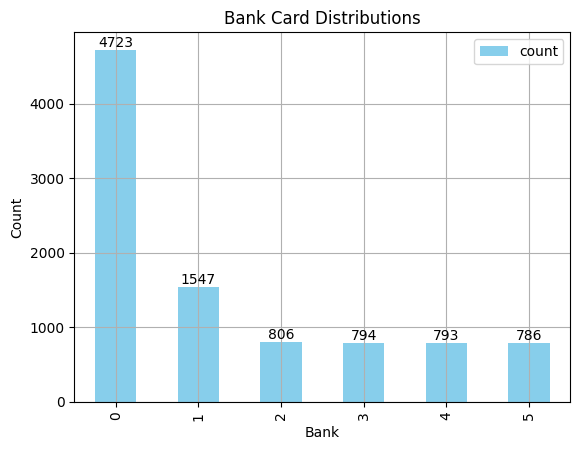

In [24]:
import matplotlib.pyplot as plt

# Mengatur variabel ax untuk menyimpan objek plot
ax = cust_bank.reset_index().plot(x='index', y='count', kind='bar', color='skyblue')
# Resetting index agar 'index' dapat diakses sebagai kolom, dan plotting 'count' melawan 'index'

# Menambahkan teks di atas setiap batang
for i, v in enumerate(cust_bank['count']):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Menambahkan grid ke plot
plt.grid()

# Memberi label sumbu x
plt.xlabel('Bank')

# Memberi label sumbu y
plt.ylabel('Count')

# Memberi judul plot
plt.title('Bank Card Distributions')

# Menampilkan plot
plt.show()


In [25]:
customer #Melihat dataframe costumer

,payCardName,payCardBirthDate,payCardBank,payCardSex,age
0,"Dr. Janet Nashiruddin, M.Ak",2010,dki,M,13
1,Balamantri Rahayu,2002,emoney,M,21
2,Dian Mustofa,1993,emoney,F,30
3,"Dasa Prakasa, S.I.Kom",1993,bni,F,30
4,Elvina Hasanah,1966,dki,M,57
...,...,...,...,...,...
9444,"R.A. Malika Samosir, S.Kom",1998,emoney,M,25
9445,Amalia Gunarto,1981,dki,M,42
9446,R.A. Lintang Wibisono,1998,brizzi,F,25
9447,Yunita Sitompul,1984,online,F,39


In [26]:
# Memilih kolom 'payCardName' dan 'age' dari DataFrame customer, kemudian mengelompokkan berdasarkan 'age' dan menghitung jumlah entri di setiap kelompok
# reset_index(name='count') digunakan untuk mereset indeks dan memberi nama baru pada kolom hasil ('count')
cust_age = customer[['payCardName', 'age']].groupby('age').size().reset_index(name='count')

# Menampilkan DataFrame cust_age yang berisi informasi jumlah pelanggan per usia
cust_age


,age,count
0,11,191
1,12,193
2,13,190
3,14,247
4,15,198
...,...,...
62,73,14
63,74,17
64,75,13
65,76,18


# Analisis Traffic Transjakarta

In [27]:
# Ekstrak jam dari kolom 'tapInTime' dan simpan dalam kolom 'tapInHour'
df1['tapInHour'] = df1['tapInTime'].dt.hour

# Ekstrak jam dari kolom 'tapOutTime' dan simpan dalam kolom 'tapOutHour'
df1['tapOutHour'] = df1['tapOutTime'].dt.hour

# Mengganti nilai 0 di kolom 'tapOutHour' dengan nilai 24
# Ini biasanya dilakukan untuk menangani kasus di mana jam keluar (tapOutHour) adalah tengah malam (00:00)
df1['tapOutHour'] = df1['tapOutHour'].replace(0, 24)

# Menghitung durasi perjalanan (tripDuration) sebagai selisih antara 'tapOutHour' dan 'tapInHour'
df1['tripDuration'] = df1['tapOutHour'] - df1['tapInHour']

# Menampilkan lima baris pertama dari DataFrame df1 setelah operasi pengolahan data selesai
df1.head()


<ipython-input-27-2434d032f160>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tapInHour'] = df1['tapInTime'].dt.hour
<ipython-input-27-2434d032f160>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tapOutHour'] = df1['tapOutTime'].dt.hour
<ipython-input-27-2434d032f160>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay,tripDuration
0,VRPJ892P3M98RA,3561407960318444,dki,"Dr. Janet Nashiruddin, M.Ak",M,2010,4,Pulo Gadung 2 - Tosari,1.0,P00167,...,Layur,-6.193539,106.89909,13.0,2023-04-03 07:13:28,3500.0,6,7,Senin,1
1,ZWCH834I6M26HS,347728053419394,emoney,Balamantri Rahayu,M,2002,JAK.28,Kp. Rambutan - Taman Wiladatika,1.0,B04633P,...,Jln. Ar Ridho,-6.308148,106.86935,30.0,2023-04-03 06:57:06,0.0,5,6,Senin,1
2,YRLD835V6L82GO,377105453850671,emoney,Dian Mustofa,F,1993,B13,Bekasi Barat - Blok M,1.0,B02192P,...,Bandar Djakarta Bekasi,-6.227085,106.99683,9.0,2023-04-03 06:01:23,20000.0,5,6,Senin,1
5,KTGG277R2I90ZB,30394281967910,bni,"Dasa Prakasa, S.I.Kom",F,1993,JAK.117,Tanjung Priok - Tanah Merdeka,1.0,B04272P,...,Simpang Gotong Royong 2,-6.125482,106.89331,21.0,2023-04-03 05:41:04,0.0,5,5,Senin,0
6,VSJU956Z4T24LI,4974829151599657,dki,Elvina Hasanah,M,1966,9F,Rusun Tambora - Pluit,0.0,P00090,...,Penjaringan,-6.126306,106.79203,7.0,2023-04-03 06:52:58,0.0,6,6,Senin,0


In [28]:
df1.columns # Melihat columns dari dataframe df1

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount', 'tapInHour', 'tapOutHour', 'tapDay', 'tripDuration'],
      dtype='object')

In [29]:
# Menampilkan nilai unik dari kolom 'tripDuration' dalam DataFrame df1
df1.tripDuration.unique()


array([1, 0, 2, 3], dtype=int32)

 Hal ini dapat membantu dalam memahami distribusi durasi perjalanan yang ada dalam dataset, serta untuk memeriksa nilai-nilai unik yang mungkin terdapat di kolom ini. Dengan informasi ini, dapat melanjutkan analisis data lebih lanjut, seperti visualisasi atau penghitungan statistik terkait durasi perjalanan.

In [30]:
# Menghasilkan ringkasan statistik deskriptif dari kolom 'tripDuration' dalam DataFrame df1
df1['tripDuration'].describe()

count    153963.000000
mean          1.203484
std           0.621669
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: tripDuration, dtype: float64

Rata-rata durasi perjalanan sebesar 1.2 jam atau 1 jam 12 menit dengan durasi tersingkat kutang dari 1 jam dan terlama yaitu 3 jam.

In [31]:
# Mengelompokkan data berdasarkan kolom 'tapInStopsName', 'tapOutStopsName', dan 'tripDuration'
# Menghitung jumlah transaksi ('transID') untuk setiap kelompok berdasarkan tripDuration
# Mengatur ulang indeks dan memberi nama baru pada kolom hasil ('trip')
# Mengurutkan hasil berdasarkan 'tripDuration' secara menurun (descending)
df1.groupby(['tapInStopsName', 'tapOutStopsName', 'tripDuration'])['transID'].count().reset_index(name='trip').sort_values(by='tripDuration', ascending=False, ignore_index=True)


,tapInStopsName,tapOutStopsName,tripDuration,trip
0,Departemen Kesehatan,Karet Kuningan,3,1
1,Pasar Kebayoran Lama,Tomang Mandala,3,1
2,Graha Werdatama Pondok Labu,Simpang Pinang I Pondok Labu,3,1
3,Pool Taksi Tanah Kusir,Masjid Raya Nurul Hidayah,3,1
4,Ir H Djuanda,Pintu Tol Cijago,3,1
...,...,...,...,...
28344,Semanggi,Dukuh Atas,0,5
28345,Rest Area TMII,Rest Area Cibubur,0,1
28346,Jelambar,Indosiar,0,1
28347,Semanggi,Cawang UKI,0,5


In [32]:
# Mengelompokkan data berdasarkan kolom 'tapInStopsName', 'tapOutStopsName', dan 'tripDuration'
# Menghitung jumlah transaksi ('transID') untuk setiap kelompok berdasarkan tripDuration
# Mengatur ulang indeks dan memberi nama baru pada kolom hasil ('trip')
# Mengurutkan hasil berdasarkan 'trip' (jumlah transaksi) secara menurun (descending)
df1.groupby(['tapInStopsName', 'tapOutStopsName', 'tripDuration'])['transID'].count().reset_index(name='trip').sort_values(by='trip', ascending=False, ignore_index=True)


,tapInStopsName,tapOutStopsName,tripDuration,trip
0,Penjaringan,Rusun Penjaringan,1,310
1,Rusun Penjaringan,Penjaringan,1,306
2,Rusun Kapuk Muara,Penjaringan,1,261
3,Penjaringan,Rusun Kapuk Muara,1,251
4,Cibubur Junction,BKN,1,199
...,...,...,...,...
28344,PLTU Pluit,Pelabuhan Kali Adem,0,1
28345,PLTU Pluit,Pluit Karang Indah,2,1
28346,PLTU Pluit,RS PIK 2,2,1
28347,PLTU Pluit,Sbr. Baywalk 1,1,1


Berapa tap di tiap halte?

In [33]:
# Memilih subset kolom 'tapInStopsName' dan 'tapOutStopsName' dari DataFrame df1
# Mengelompokkan berdasarkan kombinasi 'tapInStopsName' dan 'tapOutStopsName'
# Menghitung jumlah transaksi untuk setiap kombinasi dan mereset indeks
# Mengurutkan hasil berdasarkan jumlah transaksi secara menurun
transcount = pd.DataFrame(df1[['tapInStopsName', 'tapOutStopsName']]
                           .groupby(['tapInStopsName', 'tapOutStopsName'])
                           .size()
                           .reset_index(name='TransactionCount')
                           .sort_values(by='TransactionCount', ascending=False, ignore_index=True))

# Menampilkan DataFrame transcount yang berisi informasi jumlah transaksi untuk setiap kombinasi perhentian
transcount


,tapInStopsName,tapOutStopsName,TransactionCount
0,Penjaringan,Rusun Penjaringan,555
1,Rusun Penjaringan,Penjaringan,547
2,Rusun Kapuk Muara,Penjaringan,467
3,Penjaringan,Rusun Kapuk Muara,443
4,Cibubur Junction,BKN,373
...,...,...,...
16407,Polda Metro Jaya,Masjid Agung,1
16408,Gempol Baru 2,Sbr. Rukem Jaya 1,1
16409,Gempol Baru 2,Rorotan IX Gg. V,1
16410,Polda Metro Jaya 1,Kejaksaan Agung,1


Kapan waktu terpadat dari 5 halte teratas?

untuk Tap in

In [34]:
# Mengelompokkan data berdasarkan 'tapInStopsName' dan menghitung jumlah entri (transaksi) untuk setiap kelompok
# Mereset indeks dan memberi nama baru pada kolom hasil ('tapInCounts')
tapIn_counts = df1.groupby('tapInStopsName').size().reset_index(name='tapInCounts')

# Mengurutkan DataFrame tapIn_counts berdasarkan kolom 'tapInCounts' secara menurun
# Mengabaikan indeks asli dan mengatur ulang indeks secara berurutan mulai dari 0
tapIn_counts.sort_values(by='tapInCounts', ascending=False, ignore_index=True).head()


,tapInStopsName,tapInCounts
0,Penjaringan,1169
1,BKN,655
2,BNN LRT,625
3,Rusun Penjaringan,547
4,Garuda Taman Mini,544


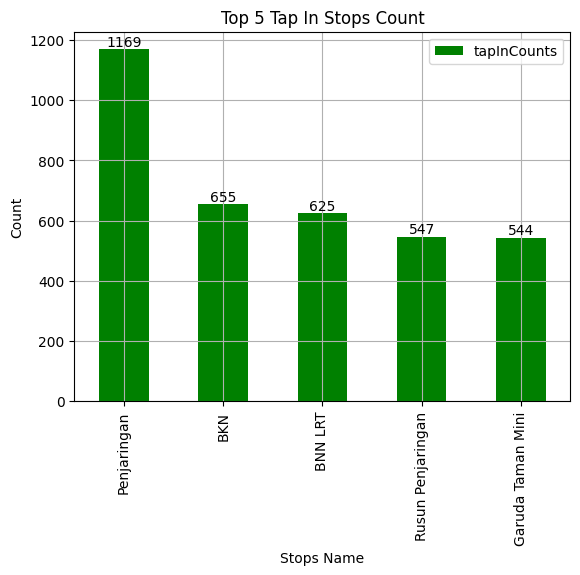

In [35]:
# Mengurutkan DataFrame tapIn_counts berdasarkan kolom 'tapInCounts' secara menurun
# Mengabaikan indeks asli dan mengatur ulang indeks secara berurutan mulai dari 0
t = tapIn_counts.sort_values(by='tapInCounts', ascending=False, ignore_index=True).head()

# Membuat plot bar berdasarkan DataFrame t
# 'tapInStopsName' sebagai sumbu x dan 'tapInCounts' sebagai sumbu y
# Mengatur warna bar menjadi hijau (green)
ax = t.plot(x='tapInStopsName', kind='bar', color='green')

# Menambahkan teks di atas setiap bar untuk menunjukkan nilai jumlah transaksi ('tapInCounts')
for i, v in enumerate(t['tapInCounts']):
    ax.text(i, v, str(v), ha='center', va='bottom')  # Menambahkan teks di atas setiap bar dengan nilai v

# Menambahkan grid ke plot
plt.grid()

# Memberi label sumbu x dengan teks 'Stops Name'
plt.xlabel('Stops Name')

# Memberi label sumbu y dengan teks 'Count'
plt.ylabel('Count')

# Memberi judul plot dengan teks 'Top 5 Tap In Stops Count'
plt.title('Top 5 Tap In Stops Count')

# Menampilkan plot
plt.show()


In [36]:
# Mengelompokkan data berdasarkan kombinasi 'tapInStopsName' dan 'tapInHour'
# Menghitung jumlah entri (transaksi) untuk setiap kombinasi
# Mereset indeks dan memberi nama baru pada kolom hasil ('tapInCounts')
tapIn_counts = df1.groupby(['tapInStopsName', 'tapInHour']).size().reset_index(name='tapInCounts')

# Mengurutkan DataFrame tapIn_counts berdasarkan kolom 'tapInCounts' secara menurun
# Mengabaikan indeks asli dan mengatur ulang indeks secara berurutan mulai dari 0
# Menghapus duplikat berdasarkan subset 'tapInStopsName' dengan mempertahankan entri pertama
tapIn_counts_sorted = tapIn_counts.sort_values(by='tapInCounts', ascending=False, ignore_index=True).drop_duplicates(subset='tapInStopsName', keep='first')


Tap In terbanyak terjadi pada halte Penjaringan pada jam 5 sore, halte BKN pada jam 6 pagi, halte BNN LRT pada jam 5 sore, halte Rusun Penjaringan pada jam 6 pagi dan halte Cibubur Junction pad jam 5 sore.

Untuk Tap out sebagai berikut :

In [37]:
# Mengelompokkan data berdasarkan kombinasi 'tapOutStopsName' dan 'tapOutHour'
# Menghitung jumlah entri (transaksi) untuk setiap kombinasi
# Mereset indeks dan memberi nama baru pada kolom hasil ('tapOutCounts')
tapOut_counts = df1.groupby(['tapOutStopsName', 'tapOutHour']).size().reset_index(name='tapOutCounts')

# Mengubah nama kolom 'tapOutStopsName' menjadi 'stopsName'
tapOut_counts.rename(columns={'tapOutStopsName' : 'stopsName'}, inplace=True)

# Mengurutkan DataFrame tapOut_counts berdasarkan kolom 'tapOutCounts' secara menurun
# Mengabaikan indeks asli dan mengatur ulang indeks secara berurutan mulai dari 0
t = tapOut_counts.sort_values(by='tapOutCounts', ascending=False, ignore_index=True).head()


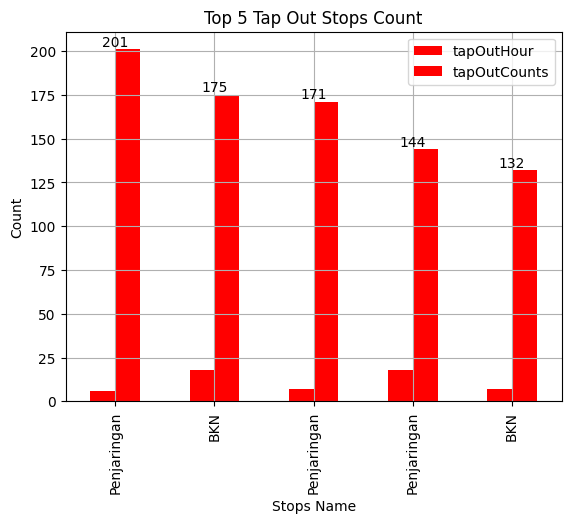

In [38]:
# Membuat plot bar dari DataFrame t
# 'stopsName' sebagai sumbu x dan 'tapOutCounts' sebagai sumbu y
# Mengatur warna bar menjadi merah (red)
ax = t.plot(x='stopsName', kind='bar', color='red')

# Menambahkan teks di atas setiap bar untuk menunjukkan nilai jumlah transaksi ('tapOutCounts')
for i, v in enumerate(t['tapOutCounts']):
    ax.text(i, v, str(v), ha='center', va='bottom')  # Menambahkan teks di atas setiap bar dengan nilai v

# Menambahkan grid ke dalam plot
plt.grid()

# Memberi label sumbu x dengan teks 'Stops Name'
plt.xlabel('Stops Name')

# Memberi label sumbu y dengan teks 'Count'
plt.ylabel('Count')

# Memberi judul plot dengan teks 'Top 5 Tap Out Stops Count'
plt.title('Top 5 Tap Out Stops Count')

# Menampilkan plot
plt.show()


Sedangkan tapOut terbanyak terjadi pada Halte Penjaringan pada jam 6 dan 7 pagi serta jam 6 sore, dan halte BKN sebanyak 175 pada jam 7 pagi dan jam 6 sore.

# **Data Analysis untuk Koordinat 5 halte terpadat **

In [39]:
# Memilih subset kolom tertentu dari DataFrame df1
cor = df1[['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']]

# Menghapus entri yang duplikat berdasarkan kolom yang dipilih
cor.drop_duplicates(inplace=True, ignore_index=True)

# Menampilkan DataFrame cor yang sudah dihapus entri duplikatnya
cor


<ipython-input-39-560d27bd4a20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cor.drop_duplicates(inplace=True, ignore_index=True)


,tapInStopsName,tapInStopsLat,tapInStopsLon,tapOutStopsName,tapOutStopsLat,tapOutStopsLon
0,Pemuda Rawamangun,-6.193488,106.891650,Layur,-6.193539,106.899090
1,Sekolah Islam PB Soedirman,-6.314293,106.862980,Jln. Ar Ridho,-6.308148,106.869350
2,Mall Metropolitan,-6.247861,106.992150,Bandar Djakarta Bekasi,-6.227085,106.996830
3,Sbr. RPTRA Radar Pembangunan,-6.120126,106.896380,Simpang Gotong Royong 2,-6.125482,106.893310
4,Jembatan Dua,-6.143279,106.793520,Penjaringan,-6.126306,106.792030
...,...,...,...,...,...,...
16409,Gg. Ampera BMW Astra,-6.292546,106.790025,Poins Square,-6.289207,106.777180
16410,Sbr. Madrasah Aliyah Citra Cendekia,-6.357553,106.800760,Tanah Baru Cipedak,-6.363462,106.806840
16411,Simpang Tebet Raya Timur 1,-6.229718,106.852860,Sawo Kecik Raya,-6.224852,106.854890
16412,Sbr. Jln. Pangeran Antasari,-6.275209,106.808665,Sbr. SDN Cilandak Barat 15,-6.288628,106.806811


In [40]:
# Menggabungkan DataFrame cor dengan DataFrame transcount berdasarkan kolom 'tapInStopsName' dan 'tapOutStopsName'
res = cor.merge(transcount, on=['tapInStopsName', 'tapOutStopsName'])

# Mengurutkan DataFrame res berdasarkan kolom 'TransactionCount' secara menurun
# Mengabaikan indeks asli dan mengatur ulang indeks secara berurutan mulai dari 0
res.sort_values(by='TransactionCount', ascending=False, ignore_index=True, inplace=True)

# Menampilkan DataFrame res yang sudah diurutkan berdasarkan jumlah transaksi (TransactionCount) secara menurun
res


,tapInStopsName,tapInStopsLat,tapInStopsLon,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,TransactionCount
0,Penjaringan,-6.126306,106.79203,Rusun Penjaringan,-6.130702,106.79487,555
1,Rusun Penjaringan,-6.130702,106.79487,Penjaringan,-6.126306,106.79203,547
2,Rusun Kapuk Muara,-6.135667,106.76299,Penjaringan,-6.126306,106.79203,467
3,Penjaringan,-6.126306,106.79203,Rusun Kapuk Muara,-6.135667,106.76299,443
4,Cibubur Junction,-6.368735,106.89366,BKN,-6.257751,106.87000,373
...,...,...,...,...,...,...,...
16409,Ruko Taman Kb. Jeruk,-6.197388,106.74818,Simpang Jengkol Joglo 1,-6.219014,106.72985,1
16410,Sbr. Madrasah Hasanatuddarain,-6.221049,106.90458,Jln. Jatinegara Timur IV,-6.222457,106.86816,1
16411,Sbr. H. Samali,-6.265816,106.84420,Univ. Indonesia,-6.353357,106.83186,1
16412,RSUD Tarakan,-6.172239,106.81098,Univ. Trisakti 2,-6.166868,106.79098,1


In [41]:
# Memilih 10 entri teratas dari DataFrame res
top10 = res.head(10)

# Menampilkan DataFrame top10 yang berisi 10 entri teratas dari res
top10


,tapInStopsName,tapInStopsLat,tapInStopsLon,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,TransactionCount
0,Penjaringan,-6.126306,106.79203,Rusun Penjaringan,-6.130702,106.79487,555
1,Rusun Penjaringan,-6.130702,106.79487,Penjaringan,-6.126306,106.79203,547
2,Rusun Kapuk Muara,-6.135667,106.76299,Penjaringan,-6.126306,106.79203,467
3,Penjaringan,-6.126306,106.79203,Rusun Kapuk Muara,-6.135667,106.76299,443
4,Cibubur Junction,-6.368735,106.89366,BKN,-6.257751,106.87000,373
5,Buperta Cibubur,-6.370321,106.89628,Cibubur Junction,-6.368735,106.89366,317
6,Titan Center,-6.281076,106.72608,St. MRT Fatmawati,-6.292589,106.79360,307
7,Garuda Taman Mini,-6.290154,106.88116,Pinang Ranti,-6.291075,106.88634,235
8,Garuda Taman Mini,-6.290154,106.88116,BKN,-6.257751,106.87000,221
9,Walikota Jakarta Timur 1,-6.212327,106.94515,Rusun Rawa Bebek,-6.196241,106.96580,175


In [42]:
import folium

# Pusatkan peta pada koordinat tertentu (misalnya Jakarta)
center_latitude = -6.1751
center_longitude = 106.8272
zoom_level = 11
m = folium.Map(location=[center_latitude, center_longitude], zoom_start=zoom_level)

# Tambahkan marker pada setiap titik pemberhentian
for index, row in top10.iterrows():
    # Tambahkan marker untuk perhentian saat naik dengan ikon hijau
    folium.Marker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],  # Lokasi perhentian saat naik
        icon=folium.Icon(icon='cloud', color='green'),  # Ikonya berbentuk awan berwarna hijau
        popup=row['tapInStopsName']  # Tampilkan nama perhentian saat naik saat marker diklik
    ).add_to(m)  # Tambahkan marker ke peta

    # Tambahkan marker untuk perhentian saat turun dengan ikon merah
    folium.Marker(
        location=[row['tapOutStopsLat'], row['tapOutStopsLon']],  # Lokasi perhentian saat turun
        icon=folium.Icon(icon='cloud', color='red'),  # Ikonya berbentuk awan berwarna merah
        popup=row['tapOutStopsName']  # Tampilkan nama perhentian saat turun saat marker diklik
    ).add_to(m)  # Tambahkan marker ke peta

# Tampilkan peta
m


# **RFM Feature Engineering**

In [43]:
df1.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount', 'tapInHour', 'tapOutHour', 'tapDay', 'tripDuration'],
      dtype='object')

In [44]:
# Melakukan penggabungan antara DataFrame df1 dengan subset DataFrame customer
# Subset DataFrame customer hanya berisi kolom 'payCardName' dan 'age'
# Penggunaan subset ini bertujuan untuk menambahkan informasi usia pelanggan ke DataFrame df1
df1 = df1.merge(customer[['payCardName', 'age']], on='payCardName')


In [45]:
# CLV (Customer Lifetime Value) adalah nilai seumur hidup pelanggan
# Di sini, kita memilih subset kolom yang akan digunakan untuk analisis CLV
data = df1[['payCardBank', 'payCardName', 'tapInTime',
            'tapOutStops', 'tapOutTime', 'payAmount',
            'tapInHour', 'tapOutHour', 'tapDay']]

data

,payCardBank,payCardName,tapInTime,tapOutStops,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay
0,dki,"Dr. Janet Nashiruddin, M.Ak",2023-04-03 06:53:02,P00127,2023-04-03 07:13:28,3500.0,6,7,Senin
1,dki,"Dr. Janet Nashiruddin, M.Ak",2023-04-04 06:15:51,P00127,2023-04-04 06:55:34,3500.0,6,6,Selasa
2,dki,"Dr. Janet Nashiruddin, M.Ak",2023-04-04 17:20:19,P00135,2023-04-04 18:15:12,3500.0,17,18,Selasa
3,dki,"Dr. Janet Nashiruddin, M.Ak",2023-04-05 06:11:12,P00127,2023-04-05 06:57:01,3500.0,6,6,Rabu
4,dki,"Dr. Janet Nashiruddin, M.Ak",2023-04-05 17:10:40,P00135,2023-04-05 18:54:44,3500.0,17,18,Rabu
...,...,...,...,...,...,...,...,...,...
153958,emoney,"R.A. Malika Samosir, S.Kom",2023-04-02 13:00:49,B03318P,2023-04-02 14:54:30,0.0,13,14,Minggu
153959,dki,Amalia Gunarto,2023-04-04 17:31:55,P00030,2023-04-04 18:38:31,3500.0,17,18,Selasa
153960,brizzi,R.A. Lintang Wibisono,2023-04-05 10:37:19,B06750P,2023-04-05 12:20:28,3500.0,10,12,Rabu
153961,online,Yunita Sitompul,2023-04-14 13:34:20,P00192,2023-04-14 16:05:12,3500.0,13,16,Jumat


In [46]:
# CLV (Customer Lifetime Value) adalah nilai seumur hidup pelanggan
# Di sini, kita memilih subset kolom yang akan digunakan untuk analisis CLV
data = df1[['payCardBank', 'payCardName', 'payCardSex',
            'payCardBirthDate', 'tapInStops', 'tapInStopsName', 'tapInTime',
            'tapOutStops', 'tapOutStopsName', 'tapOutTime', 'payAmount',
            'tapInHour', 'tapOutHour', 'tapDay', 'age']]

# Subset data yang dipilih untuk analisis CLV hanya mencakup kolom-kolom berikut
clv = data[['payCardName', 'tapOutTime', 'payAmount']]

# Menampilkan DataFrame clv yang berisi informasi yang relevan untuk analisis CLV
clv


,payCardName,tapOutTime,payAmount
0,"Dr. Janet Nashiruddin, M.Ak",2023-04-03 07:13:28,3500.0
1,"Dr. Janet Nashiruddin, M.Ak",2023-04-04 06:55:34,3500.0
2,"Dr. Janet Nashiruddin, M.Ak",2023-04-04 18:15:12,3500.0
3,"Dr. Janet Nashiruddin, M.Ak",2023-04-05 06:57:01,3500.0
4,"Dr. Janet Nashiruddin, M.Ak",2023-04-05 18:54:44,3500.0
...,...,...,...
153958,"R.A. Malika Samosir, S.Kom",2023-04-02 14:54:30,0.0
153959,Amalia Gunarto,2023-04-04 18:38:31,3500.0
153960,R.A. Lintang Wibisono,2023-04-05 12:20:28,3500.0
153961,Yunita Sitompul,2023-04-14 16:05:12,3500.0


In [47]:
# Calculate Recency (R)

# Ambil tanggal terbaru dari kolom 'tapOutTime' sebagai referensi untuk menghitung Recency (R)
max_date = clv['tapOutTime'].max()

# Hitung Recency (R) untuk setiap entri dalam DataFrame clv
# Recency (R) dihitung sebagai selisih dalam hari antara tanggal terbaru (max_date) dan 'tapOutTime'
clv['Recency'] = (max_date - clv['tapOutTime']).dt.days

# Tampilkan DataFrame clv yang sudah diperbarui dengan kolom Recency (R)
clv


<ipython-input-47-d3508513b908>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clv['Recency'] = (max_date - clv['tapOutTime']).dt.days


,payCardName,tapOutTime,payAmount,Recency
0,"Dr. Janet Nashiruddin, M.Ak",2023-04-03 07:13:28,3500.0,27
1,"Dr. Janet Nashiruddin, M.Ak",2023-04-04 06:55:34,3500.0,26
2,"Dr. Janet Nashiruddin, M.Ak",2023-04-04 18:15:12,3500.0,26
3,"Dr. Janet Nashiruddin, M.Ak",2023-04-05 06:57:01,3500.0,25
4,"Dr. Janet Nashiruddin, M.Ak",2023-04-05 18:54:44,3500.0,25
...,...,...,...,...
153958,"R.A. Malika Samosir, S.Kom",2023-04-02 14:54:30,0.0,28
153959,Amalia Gunarto,2023-04-04 18:38:31,3500.0,26
153960,R.A. Lintang Wibisono,2023-04-05 12:20:28,3500.0,25
153961,Yunita Sitompul,2023-04-14 16:05:12,3500.0,16


In [48]:
# Calculate Frequency (F)
frequency = clv['payCardName'].value_counts().reset_index()
frequency.columns = ['payCardName', 'Frequency']

# Merge the frequency back to the original dataframe
clv = clv.merge(frequency, on='payCardName')

# Sort by Frequency and then by Recency
clv_sorted = clv.sort_values(by=['Frequency', 'Recency'], ascending=[False, True])

print(clv_sorted)


                       payCardName          tapOutTime  payAmount  Recency  \
27898            Fathonah Suryatmi 2023-04-28 07:58:10        0.0        2   
27899            Fathonah Suryatmi 2023-04-28 18:27:13        0.0        2   
27933            Fathonah Suryatmi 2023-04-28 07:34:48     3500.0        2   
27934            Fathonah Suryatmi 2023-04-28 19:51:56     3500.0        2   
27896            Fathonah Suryatmi 2023-04-27 07:22:00        0.0        3   
...                            ...                 ...        ...      ...   
153832                Atma Saputra 2023-04-01 08:16:57     3500.0       29   
153849  Ir. Adinata Permadi, M.TI. 2023-04-01 14:42:06        0.0       29   
153874      R. Paris Pranowo, M.Ak 2023-04-01 15:02:50        0.0       29   
153875      Puput Wulandari, S.E.I 2023-04-01 19:52:42     3500.0       29   
153950               Limar Saptono 2023-04-01 06:04:48     3500.0       29   

        Frequency  
27898          72  
27899          72  
279

In [49]:
# Calculate Customer Monetery (M)
clv_ = df1.groupby('payCardName')['payAmount'].sum().reset_index().sort_values(by='payAmount', ascending=False, ignore_index=True)
clv_

,payCardName,payAmount
0,Aisyah Nainggolan,780000.0
1,Zamira Hutapea,760000.0
2,Balidin Irawan,760000.0
3,Ade Yolanda,740000.0
4,Ulva Laksita,740000.0
...,...,...
9444,Laila Mandasari,0.0
9445,Laila Pradipta,0.0
9446,Laila Suryatmi,0.0
9447,Laksana Nashiruddin,0.0


In [50]:
clv.drop_duplicates(subset='payCardName', keep='first', inplace=True)
clv.drop(columns=['tapOutTime', 'payAmount'], inplace=True)
clv

,payCardName,Recency,Frequency
0,"Dr. Janet Nashiruddin, M.Ak",27,36
36,Balamantri Rahayu,27,37
73,Dian Mustofa,27,35
108,"Dasa Prakasa, S.I.Kom",27,31
139,Elvina Hasanah,27,34
...,...,...,...
153958,"R.A. Malika Samosir, S.Kom",28,1
153959,Amalia Gunarto,26,1
153960,R.A. Lintang Wibisono,25,1
153961,Yunita Sitompul,16,1


# **Modeling K-Means**

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [52]:
df1.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount', 'tapInHour', 'tapOutHour', 'tapDay', 'tripDuration',
       'age'],
      dtype='object')

In [53]:
customer

,payCardName,payCardBirthDate,payCardBank,payCardSex,age
0,"Dr. Janet Nashiruddin, M.Ak",2010,dki,M,13
1,Balamantri Rahayu,2002,emoney,M,21
2,Dian Mustofa,1993,emoney,F,30
3,"Dasa Prakasa, S.I.Kom",1993,bni,F,30
4,Elvina Hasanah,1966,dki,M,57
...,...,...,...,...,...
9444,"R.A. Malika Samosir, S.Kom",1998,emoney,M,25
9445,Amalia Gunarto,1981,dki,M,42
9446,R.A. Lintang Wibisono,1998,brizzi,F,25
9447,Yunita Sitompul,1984,online,F,39


In [54]:
clv = clv.merge(clv_, on='payCardName')

In [55]:
clv.rename(columns={'payAmount' : 'Value'}, inplace=True)
clv

,payCardName,Recency,Frequency,Value
0,"Dr. Janet Nashiruddin, M.Ak",27,36,126000.0
1,Balamantri Rahayu,27,37,0.0
2,Dian Mustofa,27,35,700000.0
3,"Dasa Prakasa, S.I.Kom",27,31,0.0
4,Elvina Hasanah,27,34,0.0
...,...,...,...,...
9444,"R.A. Malika Samosir, S.Kom",28,1,0.0
9445,Amalia Gunarto,26,1,3500.0
9446,R.A. Lintang Wibisono,25,1,3500.0
9447,Yunita Sitompul,16,1,3500.0


In [56]:
data = clv
data

,payCardName,Recency,Frequency,Value
0,"Dr. Janet Nashiruddin, M.Ak",27,36,126000.0
1,Balamantri Rahayu,27,37,0.0
2,Dian Mustofa,27,35,700000.0
3,"Dasa Prakasa, S.I.Kom",27,31,0.0
4,Elvina Hasanah,27,34,0.0
...,...,...,...,...
9444,"R.A. Malika Samosir, S.Kom",28,1,0.0
9445,Amalia Gunarto,26,1,3500.0
9446,R.A. Lintang Wibisono,25,1,3500.0
9447,Yunita Sitompul,16,1,3500.0


In [57]:
columns_to_scale = ['Recency', 'Frequency', 'Value']
scaler = MinMaxScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
data

,payCardName,Recency,Frequency,Value
0,"Dr. Janet Nashiruddin, M.Ak",0.931034,0.492958,0.161538
1,Balamantri Rahayu,0.931034,0.507042,0.000000
2,Dian Mustofa,0.931034,0.478873,0.897436
3,"Dasa Prakasa, S.I.Kom",0.931034,0.422535,0.000000
4,Elvina Hasanah,0.931034,0.464789,0.000000
...,...,...,...,...
9444,"R.A. Malika Samosir, S.Kom",0.965517,0.000000,0.000000
9445,Amalia Gunarto,0.896552,0.000000,0.004487
9446,R.A. Lintang Wibisono,0.862069,0.000000,0.004487
9447,Yunita Sitompul,0.551724,0.000000,0.004487


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

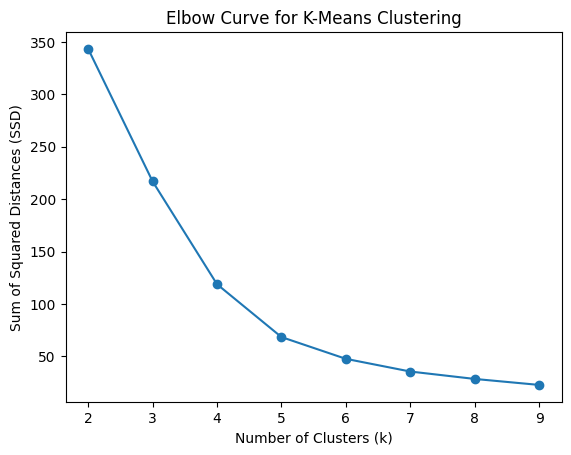

In [58]:
# Define a range of number of clusters to try (from 2 to 10 clusters)
range_n_clusters = range(2,10)

# Calculate Sum of Squared Distances (SSD) for each value of k
ssd = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data[['Recency', 'Frequency', 'Value']])
    ssd.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range_n_clusters, ssd, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Curve for K-Means Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

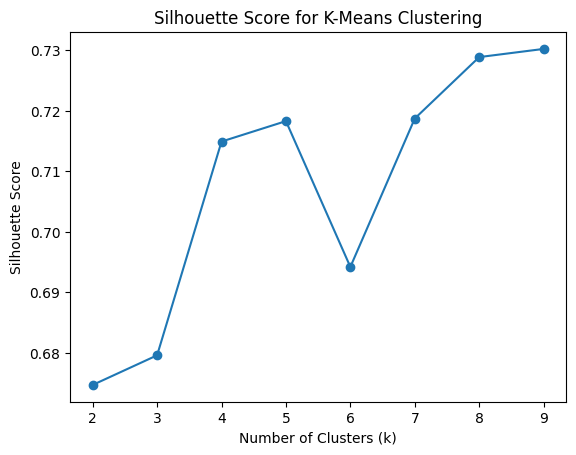

In [59]:
# Define a range of number of clusters to try (from 2 to 10 clusters)
range_n_clusters = range(2, 10)

# Calculate Silhouette Score for each value of k
silhouette_scores = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data[['Recency', 'Frequency', 'Value']])
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(data[['Recency', 'Frequency', 'Value']], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering')
plt.show()

In [60]:
# Perform K-Means Clustering with k=4 (4 clusters)
kmeans = KMeans(n_clusters=4)
data['Cluster'] = kmeans.fit_predict(data[['Recency', 'Frequency', 'Value']])
data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,payCardName,Recency,Frequency,Value,Cluster
0,"Dr. Janet Nashiruddin, M.Ak",0.931034,0.492958,0.161538,1
1,Balamantri Rahayu,0.931034,0.507042,0.000000,1
2,Dian Mustofa,0.931034,0.478873,0.897436,3
3,"Dasa Prakasa, S.I.Kom",0.931034,0.422535,0.000000,1
4,Elvina Hasanah,0.931034,0.464789,0.000000,1
...,...,...,...,...,...
9444,"R.A. Malika Samosir, S.Kom",0.965517,0.000000,0.000000,2
9445,Amalia Gunarto,0.896552,0.000000,0.004487,2
9446,R.A. Lintang Wibisono,0.862069,0.000000,0.004487,2
9447,Yunita Sitompul,0.551724,0.000000,0.004487,2


In [61]:
data.groupby('Cluster').describe()

Recency                                                              \
          count      mean       std       min       25%       50%       75%   
Cluster                                                                       
0         648.0  0.218444  0.131731  0.000000  0.103448  0.241379  0.310345   
1        3722.0  0.930006  0.006080  0.862069  0.931034  0.931034  0.931034   
2        4906.0  0.685586  0.106551  0.482759  0.586207  0.724138  0.758621   
3         173.0  0.929839  0.006328  0.896552  0.931034  0.931034  0.931034   

                  Frequency            ...                       Value  \
              max     count      mean  ...       75%       max   count   
Cluster                                ...                               
0        0.448276     648.0  0.001630  ...  0.000000  0.028169   648.0   
1        0.931034    3722.0  0.457239  ...  0.478873  1.000000  3722.0   
2        1.000000    4906.0  0.051636  ...  0.042254  0.295775  4906.0   
3        0.931034     173.0  0.457706  ...  0.478873  0.873239   173.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
Cluster                                                                        
0        0.003851  0.006021  0.000000  0.000000  0.004487  0.004487  0.030128  
1        0.079694  0.075360  0.000000  0.000000  0.130128  0.152564  0.318590  
2        0.016670  0.034631  0.000000  0.004487  0.008974  0.013462  0.358974  
3        0.850437  0.061279  0.641026  0.820513  0.846154  0.897436  1.000000  

[4 rows x 24 columns]

# **DBSCAN**

In [62]:
data_rfm = data[['Recency', 'Frequency', 'Value']]

# Contoh penggunaan DBSCAN dengan parameter yang disesuaikan
from sklearn.cluster import DBSCAN

# Membuat objek DBSCAN dengan parameter yang disesuaikan
dbscan = DBSCAN(eps=0.2, min_samples=5)  # Sesuaikan parameter sesuai kebutuhan

# Melakukan clustering dengan DBSCAN
data['DBSCAN_Cluster'] = dbscan.fit_predict(data_rfm)

# Memeriksa jumlah cluster yang dihasilkan oleh DBSCAN
unique_clusters = data['DBSCAN_Cluster'].unique()
print(f"Jumlah cluster yang dihasilkan oleh DBSCAN: {len(unique_clusters)}")


Jumlah cluster yang dihasilkan oleh DBSCAN: 4


In [63]:
from sklearn.cluster import DBSCAN

# Contoh pemilihan eps dan min_samples
eps_values = [0.2, 0.5, 1.0]  # Daftar nilai eps yang akan diuji
min_samples_values = [5, 10, 15]  # Daftar nilai min_samples yang akan diuji

best_score = -1
best_params = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(data_rfm)
        # Hitung jumlah cluster yang dihasilkan (tidak termasuk noise)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters > 1:  # Hanya pertimbangkan jika lebih dari satu cluster terbentuk
            silhouette = silhouette_score(data_rfm, clusters)
            if silhouette > best_score:
                best_score = silhouette
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

print(f"Best parameters: {best_params}")


Best parameters: {'eps': 0.2, 'min_samples': 5}


Jumlah cluster yang terbentuk: 3
Silhouette Score (DBSCAN): 0.6984200080943208


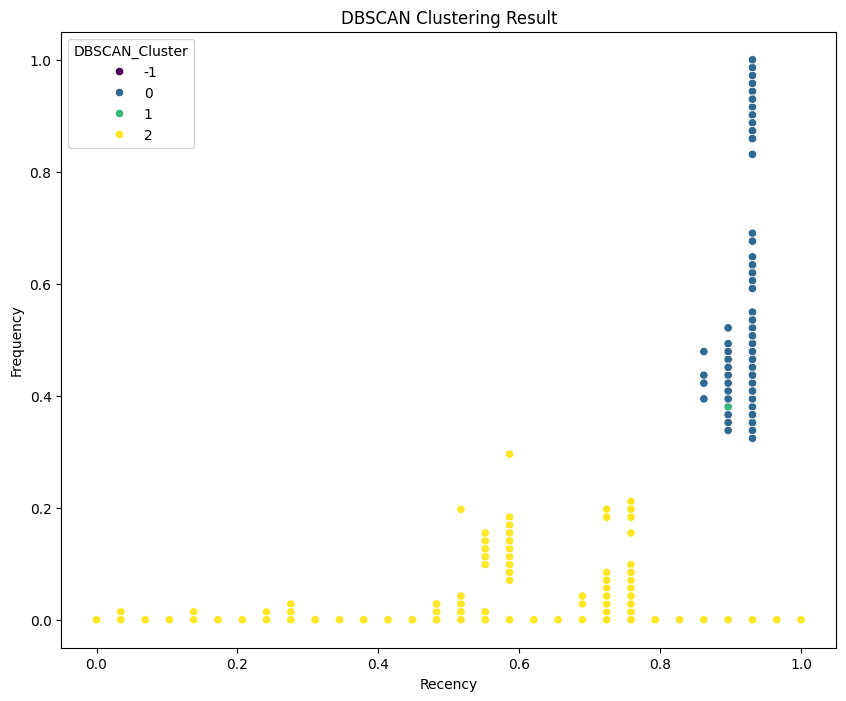

In [64]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Data yang akan digunakan (diasumsikan sudah siap)
data_rfm = data[['Recency', 'Frequency', 'Value']]

# Menggunakan parameter terbaik yang telah ditentukan sebelumnya
best_eps = 0.2  # Contoh nilai eps terbaik
best_min_samples = 5  # Contoh nilai min_samples terbaik

# Membuat model DBSCAN dengan parameter terbaik
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)

# Melakukan clustering dengan DBSCAN
clusters = dbscan.fit_predict(data_rfm)

# Menambahkan hasil clustering ke dalam data
data['DBSCAN_Cluster'] = clusters

# Menampilkan jumlah cluster yang terbentuk
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"Jumlah cluster yang terbentuk: {n_clusters}")

# Evaluasi clustering menggunakan Silhouette Score (jika terdapat lebih dari satu cluster)
if n_clusters > 1:
    silhouette = silhouette_score(data_rfm, clusters)
    print(f"Silhouette Score (DBSCAN): {silhouette}")

# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Recency', y='Frequency', hue='DBSCAN_Cluster', data=data, palette='viridis', legend='full')
plt.title('DBSCAN Clustering Result')
plt.show()


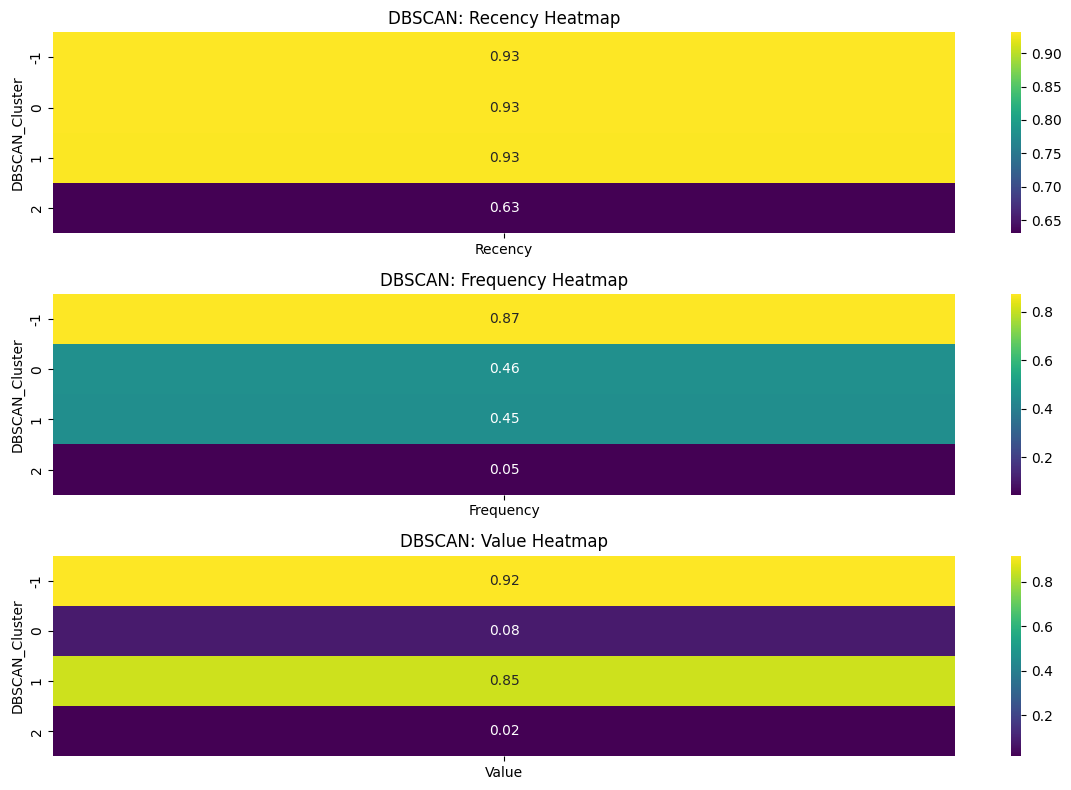

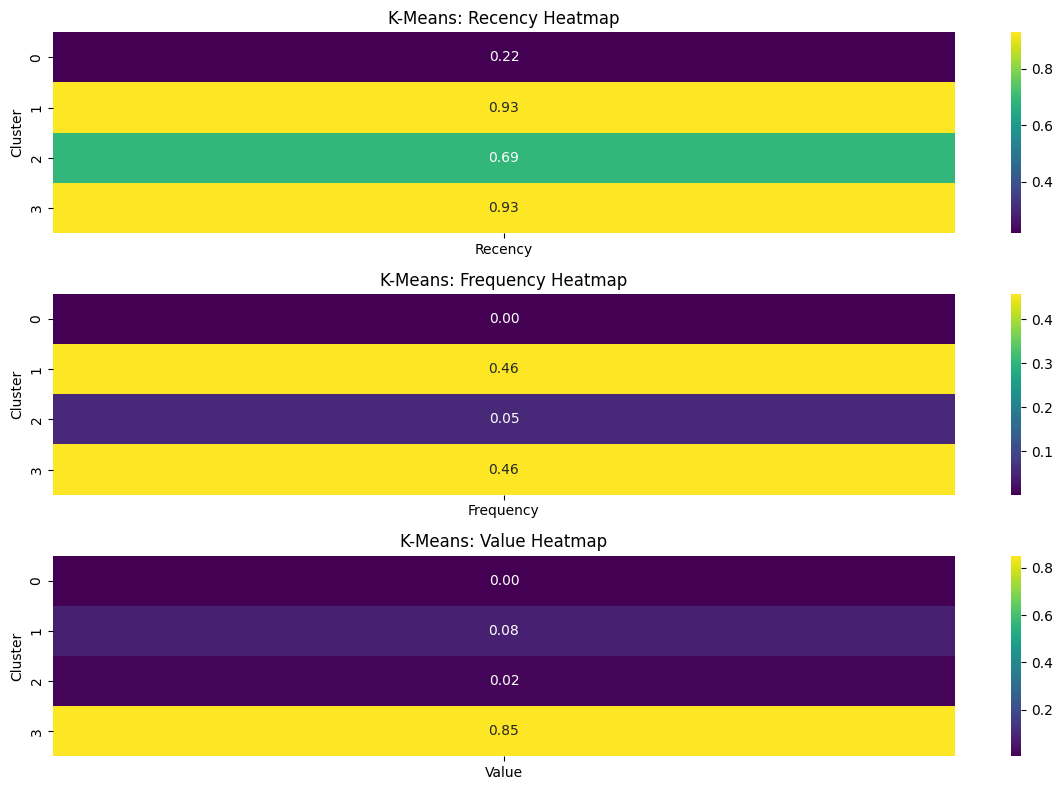

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agregasi data untuk DBSCAN
dbscan_cluster_stats = data.groupby('DBSCAN_Cluster').agg({'Recency': 'mean', 'Frequency': 'mean', 'Value': 'mean'}).reset_index()

# Membuat heatmap untuk DBSCAN
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Recency', 'Frequency', 'Value']):
    plt.subplot(3, 1, i + 1)
    heatmap_dbscan = dbscan_cluster_stats.pivot_table(index='DBSCAN_Cluster', values=col, aggfunc='mean', fill_value=0)
    sns.heatmap(heatmap_dbscan, cmap='viridis', annot=True, fmt='.2f')
    plt.title(f'DBSCAN: {col} Heatmap')

plt.tight_layout()
plt.show()

# Agregasi data untuk K-Means
kmeans_cluster_stats = data.groupby('Cluster').agg({'Recency': 'mean', 'Frequency': 'mean', 'Value': 'mean'}).reset_index()

# Membuat heatmap untuk K-Means
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Recency', 'Frequency', 'Value']):
    plt.subplot(3, 1, i + 1)
    heatmap_kmeans = kmeans_cluster_stats.pivot_table(index='Cluster', values=col, aggfunc='mean', fill_value=0)
    sns.heatmap(heatmap_kmeans, cmap='viridis', annot=True, fmt='.2f')
    plt.title(f'K-Means: {col} Heatmap')

plt.tight_layout()
plt.show()


In [66]:
import pandas as pd
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Filter data untuk DBSCAN (hapus noise)
dbscan_data = data[data['DBSCAN_Cluster'] != -1]

# Hitung Davies-Bouldin Index untuk DBSCAN
dbscan_dbi = davies_bouldin_score(dbscan_data[['Recency', 'Frequency', 'Value']], dbscan_data['DBSCAN_Cluster'])

# Hitung Silhouette Score untuk DBSCAN (ignore noise)
dbscan_silhouette = silhouette_score(dbscan_data[['Recency', 'Frequency', 'Value']], dbscan_data['DBSCAN_Cluster'])

# Hitung Davies-Bouldin Index untuk K-Means
kmeans_dbi = davies_bouldin_score(data[['Recency', 'Frequency', 'Value']], data['Cluster'])

# Hitung Silhouette Score untuk K-Means
kmeans_silhouette = silhouette_score(data[['Recency', 'Frequency', 'Value']], data['Cluster'])

# Menyusun hasil perhitungan ke dalam DataFrame
metrics_data = {
    'Algorithm': ['DBSCAN', 'K-Means'],
    'Davies-Bouldin Index': [dbscan_dbi, kmeans_dbi],
    'Silhouette Score': [dbscan_silhouette, kmeans_silhouette]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Algorithm', inplace=True)

print("Perbandingan Metrics Antara DBSCAN dan K-Means:")
print(metrics_df)


Perbandingan Metrics Antara DBSCAN dan K-Means:
           Davies-Bouldin Index  Silhouette Score
Algorithm                                        
DBSCAN                 0.390784          0.699971
K-Means                0.376267          0.711929


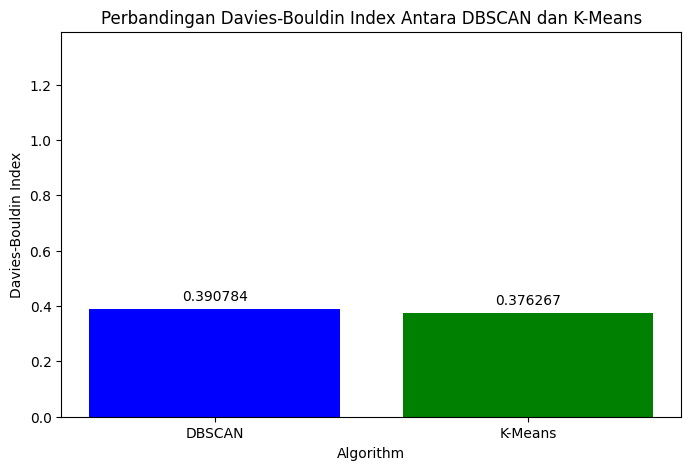

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score

# Filter data untuk DBSCAN (hapus noise)
dbscan_data = data[data['DBSCAN_Cluster'] != -1]

# Hitung Davies-Bouldin Index untuk DBSCAN
dbscan_dbi = davies_bouldin_score(dbscan_data[['Recency', 'Frequency', 'Value']], dbscan_data['DBSCAN_Cluster'])

# Hitung Davies-Bouldin Index untuk K-Means
kmeans_dbi = davies_bouldin_score(data[['Recency', 'Frequency', 'Value']], data['Cluster'])

# Menyusun hasil perhitungan ke dalam DataFrame untuk DBI
dbi_data = {
    'Algorithm': ['DBSCAN', 'K-Means'],
    'Davies-Bouldin Index': [dbscan_dbi, kmeans_dbi]
}

dbi_df = pd.DataFrame(dbi_data)

# Plot grafik batang
plt.figure(figsize=(8, 5))
plt.bar(dbi_df['Algorithm'], dbi_df['Davies-Bouldin Index'], color=['blue', 'green'])
plt.xlabel('Algorithm')
plt.ylabel('Davies-Bouldin Index')
plt.title('Perbandingan Davies-Bouldin Index Antara DBSCAN dan K-Means')
plt.ylim(0, max(dbi_df['Davies-Bouldin Index']) + 1)

# Menampilkan nilai di atas setiap batang
for i, v in enumerate(dbi_df['Davies-Bouldin Index']):
    plt.text(i, v + 0.02, f"{v:.6f}", ha='center', va='bottom')

plt.show()


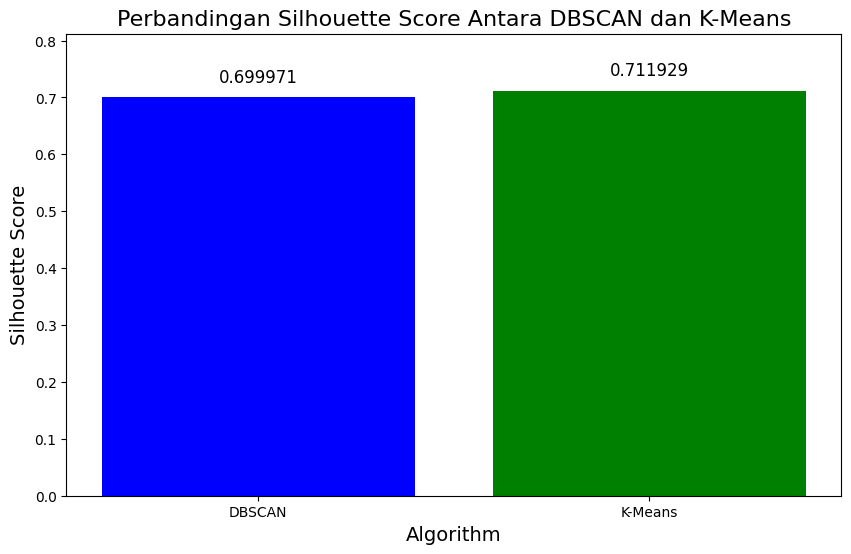

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Misalkan 'data' sudah tersedia dan memiliki kolom 'Recency', 'Frequency', 'Value', 'DBSCAN_Cluster', dan 'Cluster'

# Filter data untuk DBSCAN (hapus noise)
dbscan_data = data[data['DBSCAN_Cluster'] != -1]

# Hitung Silhouette Score untuk DBSCAN (ignore noise)
dbscan_silhouette = silhouette_score(dbscan_data[['Recency', 'Frequency', 'Value']], dbscan_data['DBSCAN_Cluster'])

# Hitung Silhouette Score untuk K-Means
kmeans_silhouette = silhouette_score(data[['Recency', 'Frequency', 'Value']], data['Cluster'])

# Menyusun hasil perhitungan ke dalam DataFrame untuk Silhouette Score
silhouette_data = {
    'Algorithm': ['DBSCAN', 'K-Means'],
    'Silhouette Score': [dbscan_silhouette, kmeans_silhouette]
}

silhouette_df = pd.DataFrame(silhouette_data)

# Plot grafik batang
plt.figure(figsize=(10, 6))
bars = plt.bar(silhouette_df['Algorithm'], silhouette_df['Silhouette Score'], color=['blue', 'green'])
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Perbandingan Silhouette Score Antara DBSCAN dan K-Means', fontsize=16)
plt.ylim(0, max(silhouette_df['Silhouette Score']) + 0.1)

# Menampilkan nilai di atas setiap batang
for i, v in enumerate(silhouette_df['Silhouette Score']):
    plt.text(i, v + 0.02, f"{v:.6f}", ha='center', va='bottom', fontsize=12)


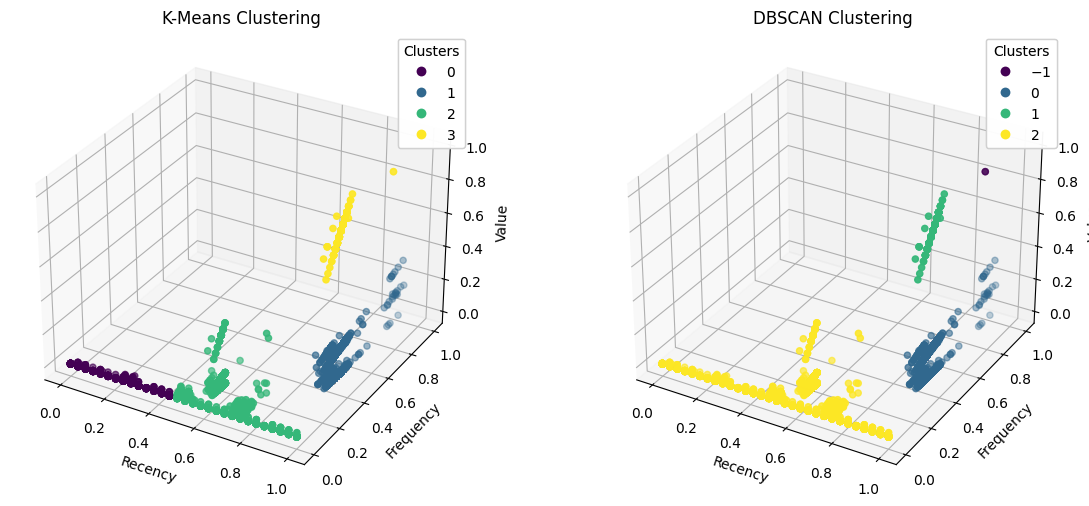

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Dataframe data dihasilkan dari proses clustering sebelumnya

# Visualisasi K-Means
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(121, projection='3d')
scatter = ax.scatter(data['Recency'], data['Frequency'], data['Value'], c=data['Cluster'], cmap='viridis')
ax.set_title('K-Means Clustering')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Value')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Visualisasi DBSCAN
ax = fig.add_subplot(122, projection='3d')
scatter = ax.scatter(data['Recency'], data['Frequency'], data['Value'], c=data['DBSCAN_Cluster'], cmap='viridis')
ax.set_title('DBSCAN Clustering')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Value')

legend2 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend2)

plt.show()


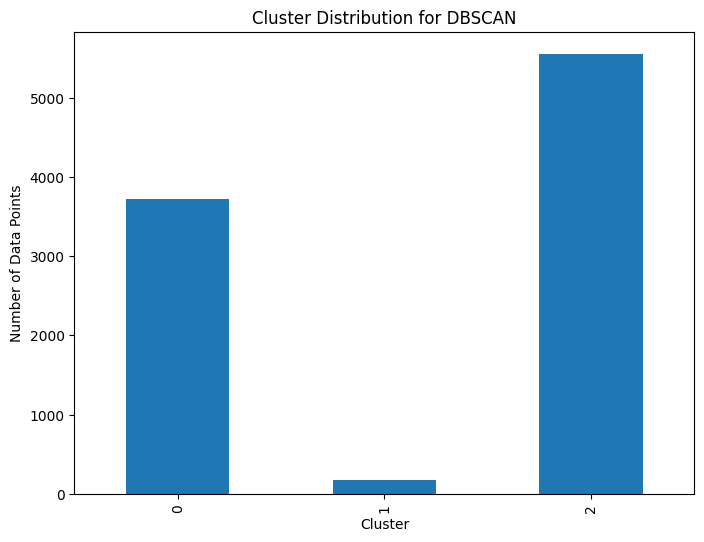

In [70]:
import matplotlib.pyplot as plt

# Menghitung jumlah data di setiap cluster untuk DBSCAN (tidak termasuk cluster -1 yang merupakan noise)
dbscan_cluster_counts = data[data['DBSCAN_Cluster'] != -1]['DBSCAN_Cluster'].value_counts()

# Memvisualisasikan distribusi jumlah data di setiap cluster untuk DBSCAN
plt.figure(figsize=(8, 6))
dbscan_cluster_counts.sort_index().plot(kind='bar')
plt.title('Cluster Distribution for DBSCAN')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()


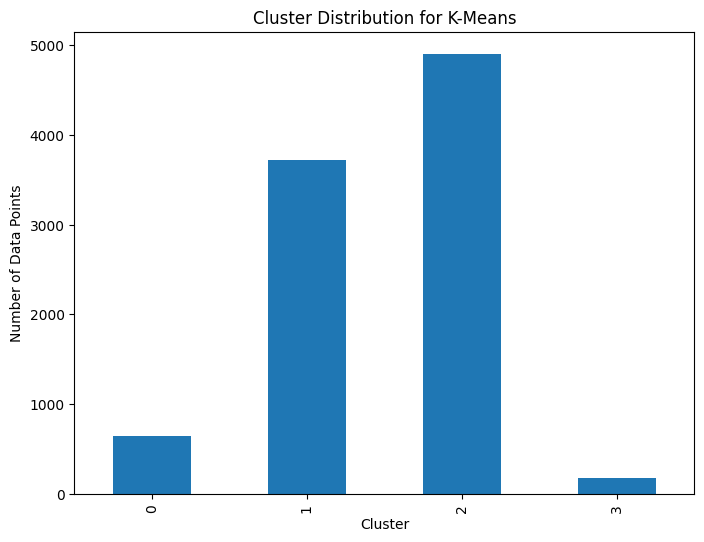

In [71]:
# Menghitung jumlah data di setiap cluster untuk K-Means
kmeans_cluster_counts = data['Cluster'].value_counts()

# Memvisualisasikan distribusi jumlah data di setiap cluster untuk K-Means
plt.figure(figsize=(8, 6))
kmeans_cluster_counts.sort_index().plot(kind='bar')
plt.title('Cluster Distribution for K-Means')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()


In [72]:
data.groupby('DBSCAN_Cluster').describe()

Recency                                                    \
                 count      mean       std       min       25%       50%   
DBSCAN_Cluster                                                             
-1                 2.0  0.931034  0.000000  0.931034  0.931034  0.931034   
 0              3722.0  0.930006  0.006080  0.862069  0.931034  0.931034   
 1               171.0  0.929825  0.006364  0.896552  0.931034  0.931034   
 2              5554.0  0.631083  0.185860  0.000000  0.586207  0.724138   

                                   Frequency            ...     Value  \
                     75%       max     count      mean  ...       75%   
DBSCAN_Cluster                                          ...             
-1              0.931034  0.931034       2.0  0.873239  ...  0.917308   
 0              0.931034  0.931034    3722.0  0.457239  ...  0.152564   
 1              0.931034  0.931034     171.0  0.452846  ...  0.897436   
 2              0.758621  1.000000    5554.0  0.045801  ...  0.013462   

                         Cluster                                               
                     max   count      mean       std  min  25%  50%  75%  max  
DBSCAN_Cluster                                                                 
-1              0.917308     2.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0  
 0              0.318590  3722.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
 1              1.000000   171.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0  
 2              0.358974  5554.0  1.766655  0.642117  0.0  2.0  2.0  2.0  2.0  

[4 rows x 32 columns]

In [73]:
import pandas as pd

# Asumsikan 'data' adalah dataframe yang telah diinisialisasi dan berisi hasil klastering
# Agregasi data untuk K-Means
kmeans_cluster_stats = data.groupby('Cluster').agg({'Recency': ['count', 'mean', 'std', 'min', 'max']})
kmeans_cluster_stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', 'Max']  # Menambahkan nama kolom
kmeans_cluster_stats.reset_index(inplace=True)  # Reset index agar 'Cluster' menjadi kolom
kmeans_cluster_stats = kmeans_cluster_stats.rename(columns={'Cluster': 'K-Means Cluster'})  # Mengganti nama kolom

# Agregasi data untuk DBSCAN
dbscan_cluster_stats = data.groupby('DBSCAN_Cluster').agg({'Recency': ['count', 'mean', 'std', 'min', 'max']})
dbscan_cluster_stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', 'Max']  # Menambahkan nama kolom
dbscan_cluster_stats.reset_index(inplace=True)  # Reset index agar 'DBSCAN_Cluster' menjadi kolom
dbscan_cluster_stats = dbscan_cluster_stats.rename(columns={'DBSCAN_Cluster': 'DBSCAN Cluster'})  # Mengganti nama kolom

# Tampilkan statistik hasil klastering untuk setiap fitur
print("K-Means Recency Cluster Statistics:\n", kmeans_cluster_stats)
print("\nDBSCAN Recency Cluster Statistics:\n", dbscan_cluster_stats)


K-Means Recency Cluster Statistics:
    K-Means Cluster  Count      Mean   Std Dev       Min       Max
0                0    648  0.218444  0.131731  0.000000  0.448276
1                1   3722  0.930006  0.006080  0.862069  0.931034
2                2   4906  0.685586  0.106551  0.482759  1.000000
3                3    173  0.929839  0.006328  0.896552  0.931034

DBSCAN Recency Cluster Statistics:
    DBSCAN Cluster  Count      Mean   Std Dev       Min       Max
0              -1      2  0.931034  0.000000  0.931034  0.931034
1               0   3722  0.930006  0.006080  0.862069  0.931034
2               1    171  0.929825  0.006364  0.896552  0.931034
3               2   5554  0.631083  0.185860  0.000000  1.000000


In [74]:
import pandas as pd

# Asumsikan 'data' adalah dataframe yang telah diinisialisasi dan berisi hasil klastering
# Agregasi data untuk K-Means
kmeans_cluster_stats = data.groupby('Cluster').agg({'Frequency': ['count', 'mean', 'std', 'min', 'max']})
kmeans_cluster_stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', 'Max']  # Menambahkan nama kolom
kmeans_cluster_stats.reset_index(inplace=True)  # Reset index agar 'Cluster' menjadi kolom
kmeans_cluster_stats = kmeans_cluster_stats.rename(columns={'Cluster': 'K-Means Cluster'})  # Mengganti nama kolom

# Agregasi data untuk DBSCAN
dbscan_cluster_stats = data.groupby('DBSCAN_Cluster').agg({'Frequency': ['count', 'mean', 'std', 'min', 'max']})
dbscan_cluster_stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', 'Max']  # Menambahkan nama kolom
dbscan_cluster_stats.reset_index(inplace=True)  # Reset index agar 'DBSCAN_Cluster' menjadi kolom
dbscan_cluster_stats = dbscan_cluster_stats.rename(columns={'DBSCAN_Cluster': 'DBSCAN Cluster'})  # Mengganti nama kolom

# Tampilkan statistik hasil klastering untuk setiap fitur
print("K-Means Frequency Cluster Statistics:\n", kmeans_cluster_stats)
print("\nDBSCAN Frequency Cluster Statistics:\n", dbscan_cluster_stats)


K-Means Frequency Cluster Statistics:
    K-Means Cluster  Count      Mean   Std Dev       Min       Max
0                0    648  0.001630  0.004577  0.000000  0.028169
1                1   3722  0.457239  0.053038  0.323944  1.000000
2                2   4906  0.051636  0.051405  0.000000  0.295775
3                3    173  0.457706  0.056248  0.338028  0.873239

DBSCAN Frequency Cluster Statistics:
    DBSCAN Cluster  Count      Mean   Std Dev       Min       Max
0              -1      2  0.873239  0.000000  0.873239  0.873239
1               0   3722  0.457239  0.053038  0.323944  1.000000
2               1    171  0.452846  0.033852  0.338028  0.535211
3               2   5554  0.045801  0.050935  0.000000  0.295775


In [75]:
import pandas as pd

# Asumsikan 'data' adalah dataframe yang telah diinisialisasi dan berisi hasil klastering
# Agregasi data untuk K-Means
kmeans_cluster_stats = data.groupby('Cluster').agg({'Value': ['count', 'mean', 'std', 'min', 'max']})
kmeans_cluster_stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', 'Max']  # Menambahkan nama kolom
kmeans_cluster_stats.reset_index(inplace=True)  # Reset index agar 'Cluster' menjadi kolom
kmeans_cluster_stats = kmeans_cluster_stats.rename(columns={'Cluster': 'K-Means Cluster'})  # Mengganti nama kolom

# Agregasi data untuk DBSCAN
dbscan_cluster_stats = data.groupby('DBSCAN_Cluster').agg({'Value': ['count', 'mean', 'std', 'min', 'max']})
dbscan_cluster_stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', 'Max']  # Menambahkan nama kolom
dbscan_cluster_stats.reset_index(inplace=True)  # Reset index agar 'DBSCAN_Cluster' menjadi kolom
dbscan_cluster_stats = dbscan_cluster_stats.rename(columns={'DBSCAN_Cluster': 'DBSCAN Cluster'})  # Mengganti nama kolom

# Tampilkan statistik hasil klastering untuk setiap fitur
print("K-Means Monetery Cluster Statistics:\n", kmeans_cluster_stats)
print("\nDBSCAN Monetery Cluster Statistics:\n", dbscan_cluster_stats)


K-Means Monetery Cluster Statistics:
    K-Means Cluster  Count      Mean   Std Dev       Min       Max
0                0    648  0.003851  0.006021  0.000000  0.030128
1                1   3722  0.079694  0.075360  0.000000  0.318590
2                2   4906  0.016670  0.034631  0.000000  0.358974
3                3    173  0.850437  0.061279  0.641026  1.000000

DBSCAN Monetery Cluster Statistics:
    DBSCAN Cluster  Count      Mean   Std Dev       Min       Max
0              -1      2  0.917308  0.000000  0.917308  0.917308
1               0   3722  0.079694  0.075360  0.000000  0.318590
2               1    171  0.849655  0.061206  0.641026  1.000000
3               2   5554  0.015174  0.032871  0.000000  0.358974
